Folders in dataset: ['Augmented Curry Leaf', 'Augmented Arjun Leaf', 'Augmented Marsh Pennywort Leaf', 'Augmented Mint Leaf', 'Augmented Neem Leaf', 'Augmented Rubble Leaf']
Found 7724 images belonging to 6 classes.
Found 1931 images belonging to 6 classes.


<ipython-input-41-52b90e80e460>:52: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=(150, 150, 3), include_top=False, weights='imagenet')


Epoch 1/25
242/242 ━━━━━━━━━━━━━━━━━━━━ 289s 1s/step - accuracy: 0.8511 - loss: 0.4234 - val_accuracy: 0.9845 - val_loss: 0.0487
Epoch 2/25
242/242 ━━━━━━━━━━━━━━━━━━━━ 291s 1s/step - accuracy: 0.9713 - loss: 0.0839 - val_accuracy: 0.9860 - val_loss: 0.0423
Epoch 3/25
242/242 ━━━━━━━━━━━━━━━━━━━━ 294s 1s/step - accuracy: 0.9783 - loss: 0.0606 - val_accuracy: 0.9922 - val_loss: 0.0192
Epoch 4/25
242/242 ━━━━━━━━━━━━━━━━━━━━ 283s 1s/step - accuracy: 0.9806 - loss: 0.0554 - val_accuracy: 0.9834 - val_loss: 0.0466
Epoch 5/25
242/242 ━━━━━━━━━━━━━━━━━━━━ 248s 1s/step - accuracy: 0.9795 - loss: 0.0540 - val_accuracy: 0.9943 - val_loss: 0.0167
Epoch 6/25
242/242 ━━━━━━━━━━━━━━━━━━━━ 262s 1s/step - accuracy: 0.9817 - loss: 0.0459 - val_accuracy: 0.9855 - val_loss: 0.0437
Epoch 7/25
242/242 ━━━━━━━━━━━━━━━━━━━━ 262s 1s/step - accuracy: 0.9817 - loss: 0.0505 - val_accuracy: 0.9917 - val_loss: 0.0249
Epoch 8/25
242/242 ━━━━━━━━━━━━━━━━━━━━ 265s 1s/step - accuracy: 0.9799 - loss: 0.0539 - val_accu

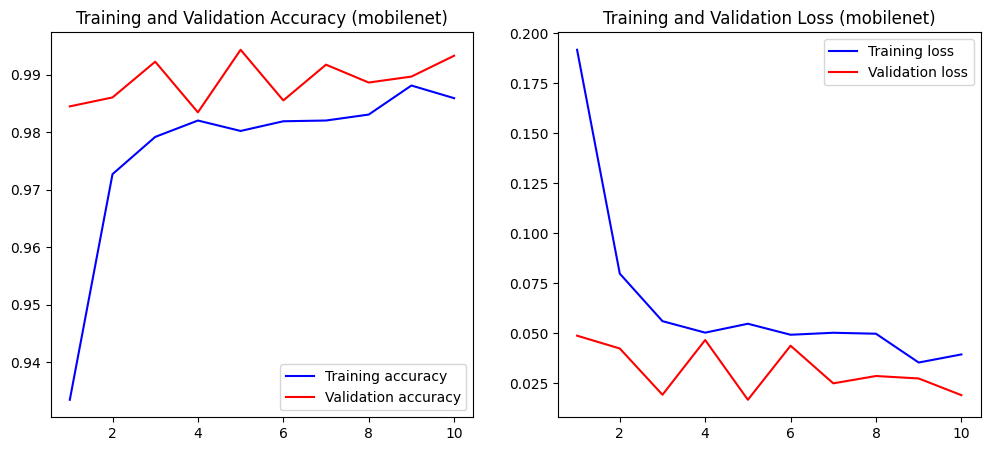

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2, ResNet50, VGG16
from tensorflow.keras import layers, models, callbacks
import matplotlib.pyplot as plt
import os

dataset_path = "/content/drive/MyDrive/augmented_dataset/new/Augmented Images (Version 02)"

print("Folders in dataset:", os.listdir(dataset_path))

IMG_SIZE = (150, 150)
BATCH_SIZE = 32
EPOCHS = 25

datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    directory=dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    directory=dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# choose 'mobilenet', 'resnet', or 'vgg'
MODEL_NAME = 'mobilenet'  # change to 'resnet' or 'vgg' to try different models

if MODEL_NAME == 'mobilenet':
    base_model = MobileNetV2(input_shape=(150, 150, 3), include_top=False, weights='imagenet')
elif MODEL_NAME == 'resnet':
    base_model = ResNet50(input_shape=(150, 150, 3), include_top=False, weights='imagenet')
elif MODEL_NAME == 'vgg':
    base_model = VGG16(input_shape=(150, 150, 3), include_top=False, weights='imagenet')
else:
    raise ValueError("Invalid model name! Choose from 'mobilenet', 'resnet', or 'vgg'.")

base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_data.num_classes, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

early_stopping = callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    train_data,
    epochs=EPOCHS,
    validation_data=val_data,
    callbacks=[early_stopping]
)

model.save(f"{MobilenetLeaf}_leaf_model.keras")

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title(f'Training and Validation Accuracy ({MODEL_NAME})')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title(f'Training and Validation Loss ({MODEL_NAME})')
plt.legend()

plt.show()


✅ Model Loaded Successfully!
Found 9655 images belonging to 6 classes.
302/302 ━━━━━━━━━━━━━━━━━━━━ 449s 1s/step

📊 Classification Report:
                                 precision    recall  f1-score   support

          Augmented Arjun Leaf       1.00      1.00      1.00      1605
          Augmented Curry Leaf       1.00      1.00      1.00      1610
Augmented Marsh Pennywort Leaf       1.00      1.00      1.00      1610
           Augmented Mint Leaf       1.00      1.00      1.00      1610
           Augmented Neem Leaf       1.00      1.00      1.00      1610
         Augmented Rubble Leaf       1.00      1.00      1.00      1610

                      accuracy                           1.00      9655
                     macro avg       1.00      1.00      1.00      9655
                  weighted avg       1.00      1.00      1.00      9655

✅ Accuracy: 0.9997928534438115
✅ Precision: 0.9997931104494643
✅ Recall: 0.9997928534438115
✅ F1-score: 0.9997928855595009
✅ F2-score: 0.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


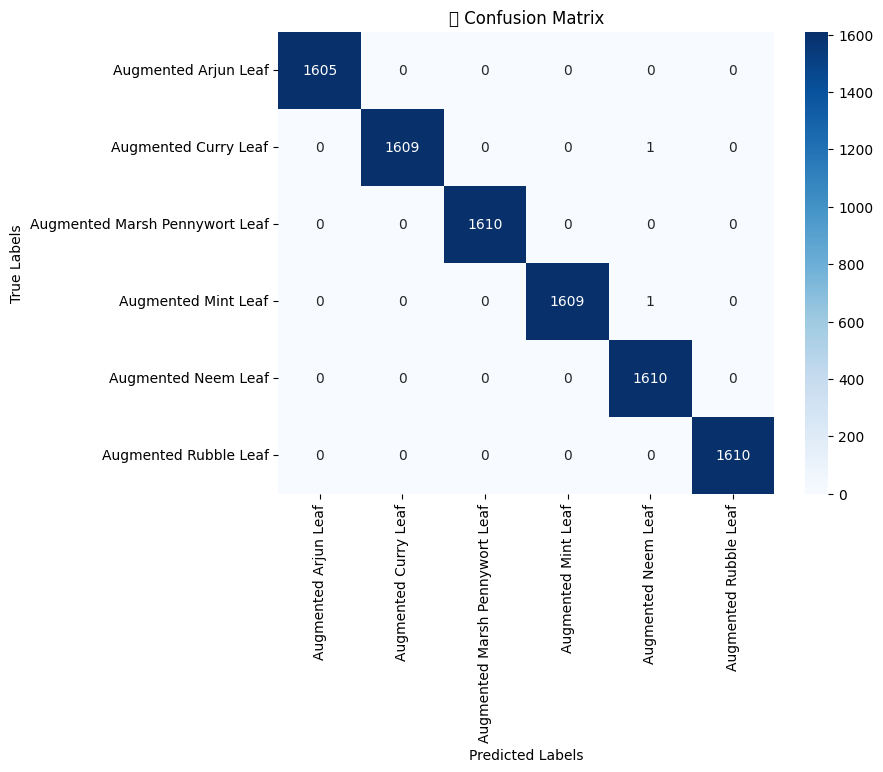

In [ ]:
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, fbeta_score
import matplotlib.pyplot as plt


model_path = "/content/mobilenet_leaf_model.keras"
model = load_model(model_path)
print("Model Loaded Successfully!")

IMG_SIZE = (224, 224) 
BATCH_SIZE = 32

dataset_path = "/content/drive/MyDrive/augmented_dataset/new/Augmented Images (Version 02)"

datagen = ImageDataGenerator(rescale=1.0/255.0)

val_data = datagen.flow_from_directory(
    directory=dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False 
)

y_true = val_data.classes
class_names = list(val_data.class_indices.keys())

y_pred_probs = model.predict(val_data)
y_pred = np.argmax(y_pred_probs, axis=1)

print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=class_names))
print("Accuracy:", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred, average='weighted'))
print("Recall:", recall_score(y_true, y_pred, average='weighted'))
print("F1-score:", f1_score(y_true, y_pred, average='weighted'))
print("F2-score:", fbeta_score(y_true, y_pred, beta=2, average='weighted'))

def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()

plot_confusion_matrix(y_true, y_pred, class_names)


✅ Model Loaded Successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step

🎯 Predicted Class: Augmented Neem Leaf
📊 Class Probabilities:
Augmented Arjun Leaf: 0.13%
Augmented Curry Leaf: 0.00%
Augmented Marsh Pennywort Leaf: 0.00%
Augmented Mint Leaf: 0.01%
Augmented Neem Leaf: 87.65%
Augmented Rubble Leaf: 12.21%


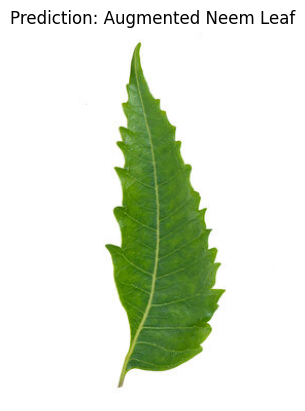

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

model_path = "/content/mobilenet_leaf_model.keras"
model = load_model(model_path)
print("Model Loaded Successfully!")

class_names = ['Augmented Arjun Leaf', 'Augmented Curry Leaf',
               'Augmented Marsh Pennywort Leaf', 'Augmented Mint Leaf',
               'Augmented Neem Leaf', 'Augmented Rubble Leaf']

img_path = "/content/image10.jpg"
img = image.load_img(img_path, target_size=(224, 224)) 
img_array = image.img_to_array(img) / 255.0  
img_array = np.expand_dims(img_array, axis=0)

predictions = model.predict(img_array)[0]
predicted_class_index = np.argmax(predictions)
predicted_class = class_names[predicted_class_index]

print(f"\nPredicted Class: {predicted_class}")
print("Class Probabilities:")
for i, class_name in enumerate(class_names):
    print(f"{class_name}: {predictions[i]*100:.2f}%")

plt.imshow(image.load_img(img_path))
plt.title(f"Prediction: {predicted_class}")
plt.axis('off')
plt.show()

In [ ]:
import torch
# Assuming 'model' is your trained PyTorch model
torch.save(model.state_dict(), "model_weights.pt")
